In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/csvFiles/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# Fare_amount is the target column

In [4]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['hour'] = df['pickup_datetime'].dt.hour

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
 7   year               200000 non-null  int64              
 8   month              200000 non-null  int64              
 9   weekday            200000 non-null  int64              
 10  hour               200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(5)
memory usage: 16.8 MB


In [9]:
df["hour"].value_counts()

19    12605
18    12072
20    11755
21    11446
22    11023
13    10024
12     9924
23     9805
17     9758
14     9749
15     9614
11     9422
9      9339
8      9075
10     8944
16     8313
0      7844
7      7231
1      5908
2      4422
6      4139
3      3256
4      2365
5      1967
Name: hour, dtype: int64

In [15]:
# pd.cut() function is used here to create new columns 'Monthly_Quarter' and 'Hourly_Segments'.
df['Monthly_Quarter'] = pd.cut(df['month'], bins=[0, 3, 6, 9, 12],
                               labels=['Q1', 'Q2', 'Q3', 'Q4'],include_lowest=True)

df['Hourly_Segments'] = pd.cut(df['hour'], bins=[0, 3, 7, 11, 15, 19, 24],
                               labels=['H1', 'H2', 'H3', 'H4', 'H5', 'H6'],
                               include_lowest=True)

In [16]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,Monthly_Quarter,Hourly_Segments
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Q2,H5
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Q3,H6
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Q3,H6
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Q2,H3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Q3,H5


In [17]:
df.drop(['pickup_datetime','month', 'hour','Monthly_Quarter'], axis=1, inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Hourly_Segments
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,H5
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,H6
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,H6
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,H3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,H5


In [18]:
#statistical summary
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,2011.742440,3.048425
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,1.856397,1.946946
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,2010.000000,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,3.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,5.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,6.000000


In [19]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'weekday'],
      dtype='object')

In [20]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
year                 0
weekday              0
Hourly_Segments      0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
weekday              0
Hourly_Segments      0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   fare_amount        199999 non-null  float64 
 1   pickup_longitude   199999 non-null  float64 
 2   pickup_latitude    199999 non-null  float64 
 3   dropoff_longitude  199999 non-null  float64 
 4   dropoff_latitude   199999 non-null  float64 
 5   passenger_count    199999 non-null  int64   
 6   year               199999 non-null  int64   
 7   weekday            199999 non-null  int64   
 8   Hourly_Segments    199999 non-null  category
dtypes: category(1), float64(5), int64(3)
memory usage: 13.9 MB


In [26]:
category_columns = df.select_dtypes(include= "category").columns
category_columns

Index(['Hourly_Segments'], dtype='object')

In [27]:
object_columns = df.select_dtypes(include= "object").columns
object_columns

Index([], dtype='object')

<Figure size 2000x1000 with 0 Axes>

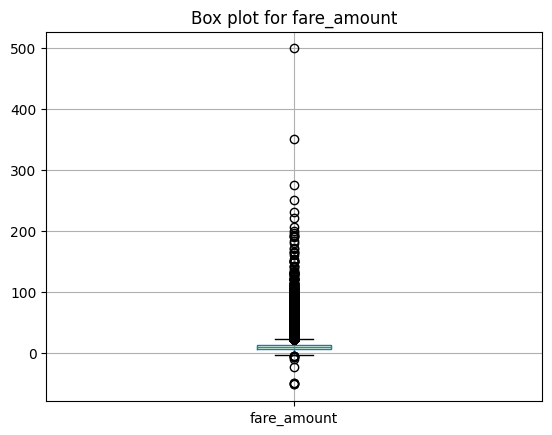

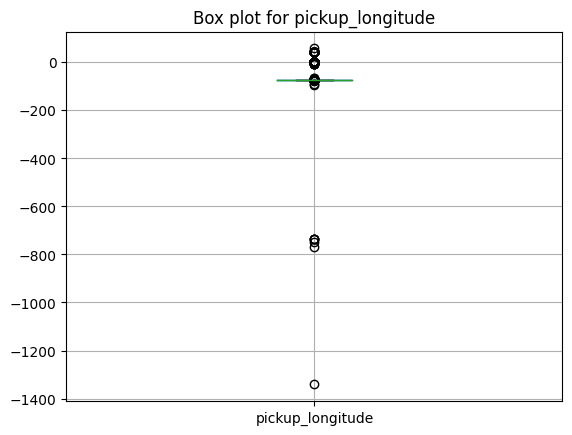

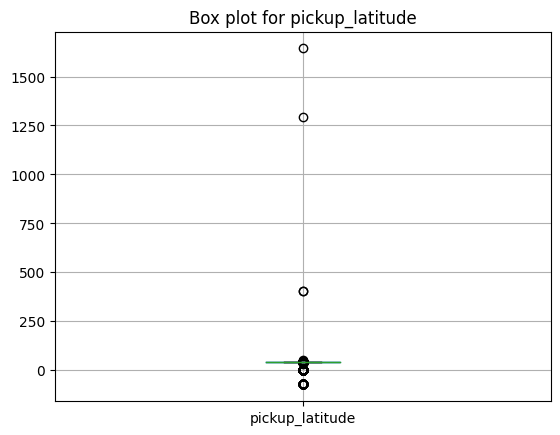

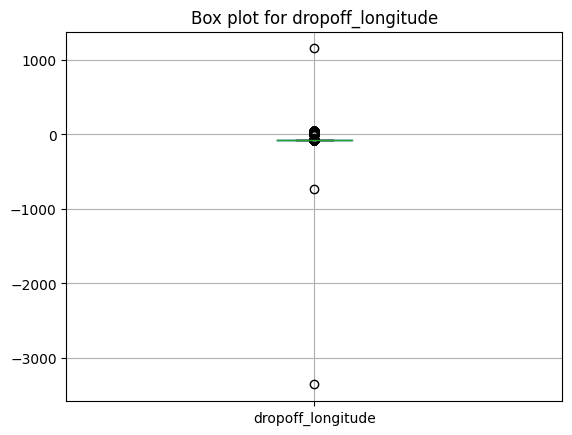

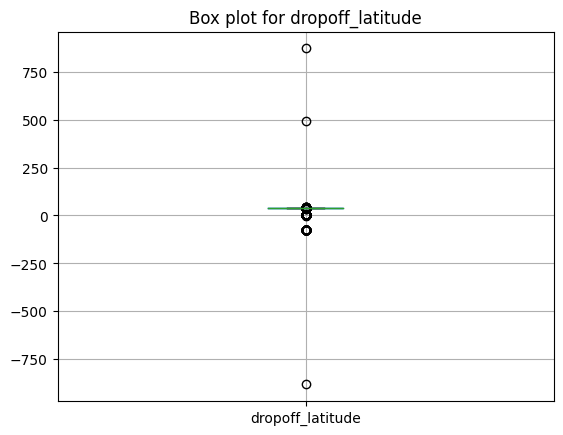

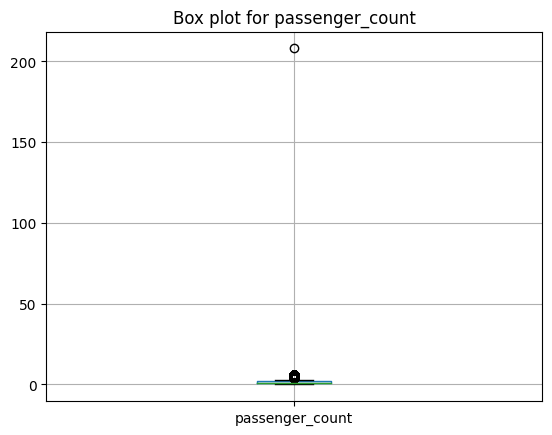

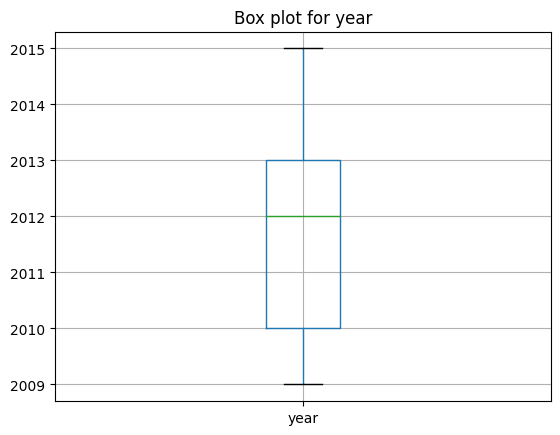

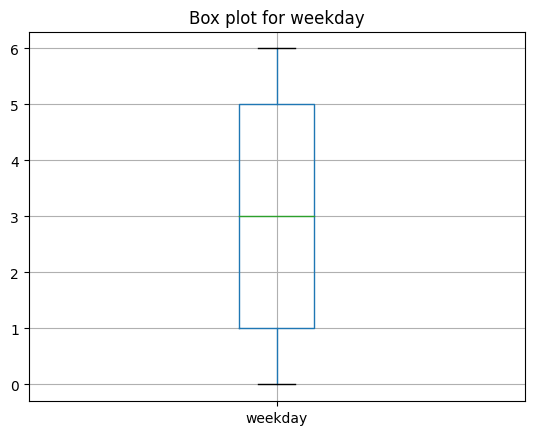

In [28]:
# outliers detection using boxplot
plt.figure(figsize=(20,10))

for column in df.select_dtypes(include='number').columns:
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=column)
    plt.title(f'Box plot for {column}')

plt.show()

In [29]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [36]:
def add(a,b,c):
  return a+b+c

add(3,4,5)

12

In [30]:
df = treat_outliers_all(df , numeric_columns)

<Figure size 2000x1000 with 0 Axes>

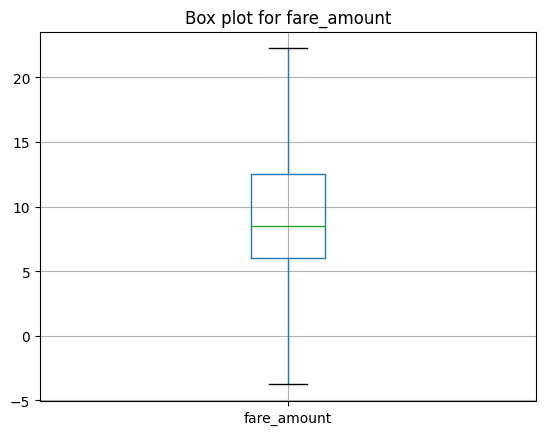

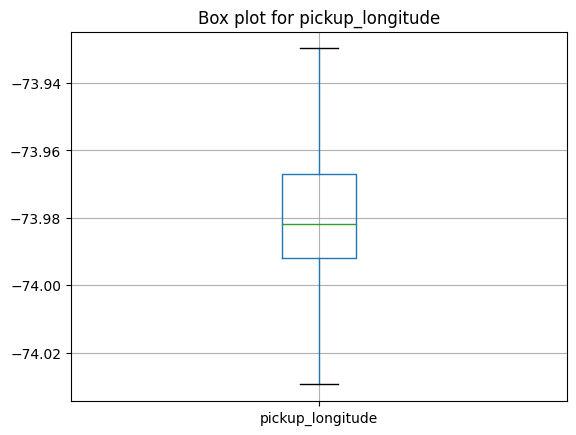

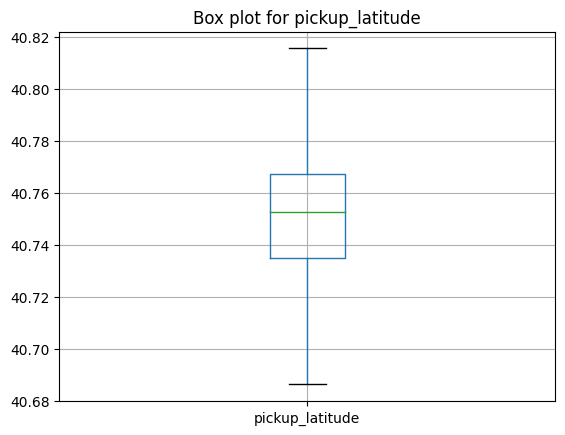

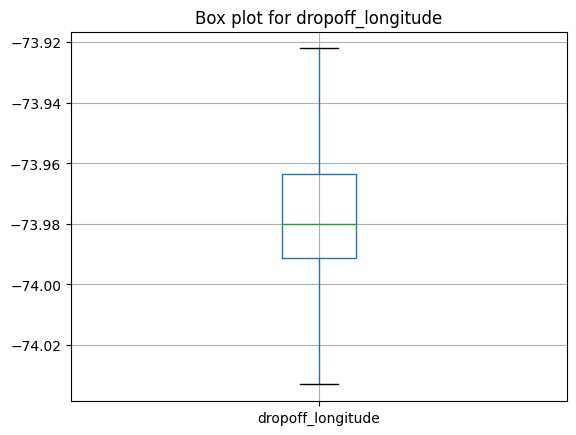

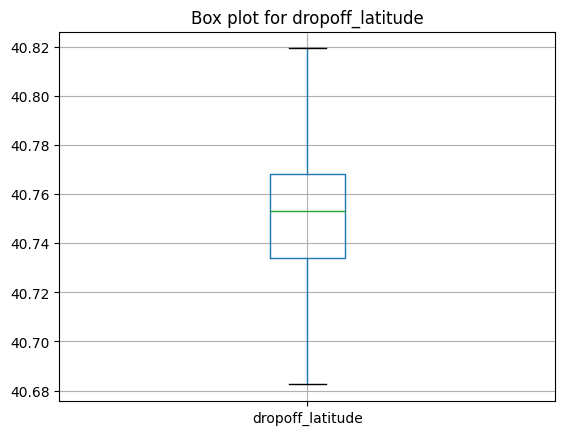

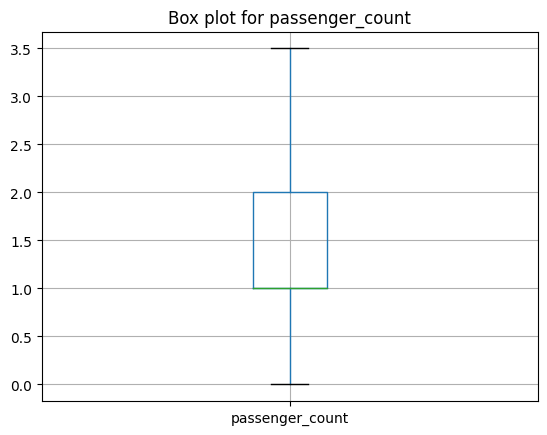

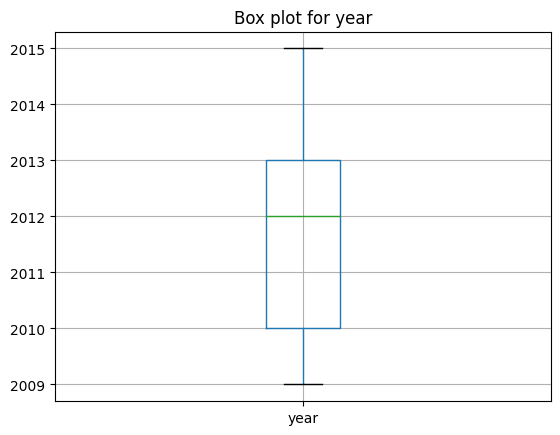

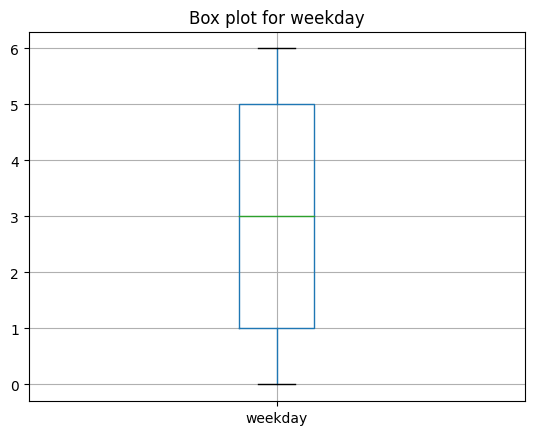

In [31]:
# outliers detection using boxplot
plt.figure(figsize=(20,10))

for column in df.select_dtypes(include='number').columns:
    plt.figure()  # Create a new figure for each box plot
    df.boxplot(column=column)
    plt.title(f'Box plot for {column}')

plt.show()

In [32]:
#We will only keep the observation where fare is more than O USD
df = df.loc[(df.fare_amount > 0)]

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Hourly_Segments'] = le.fit_transform(df['Hourly_Segments'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199977 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199977 non-null  float64
 1   pickup_longitude   199977 non-null  float64
 2   pickup_latitude    199977 non-null  float64
 3   dropoff_longitude  199977 non-null  float64
 4   dropoff_latitude   199977 non-null  float64
 5   passenger_count    199977 non-null  float64
 6   year               199977 non-null  int64  
 7   weekday            199977 non-null  int64  
 8   Hourly_Segments    199977 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 15.3 MB


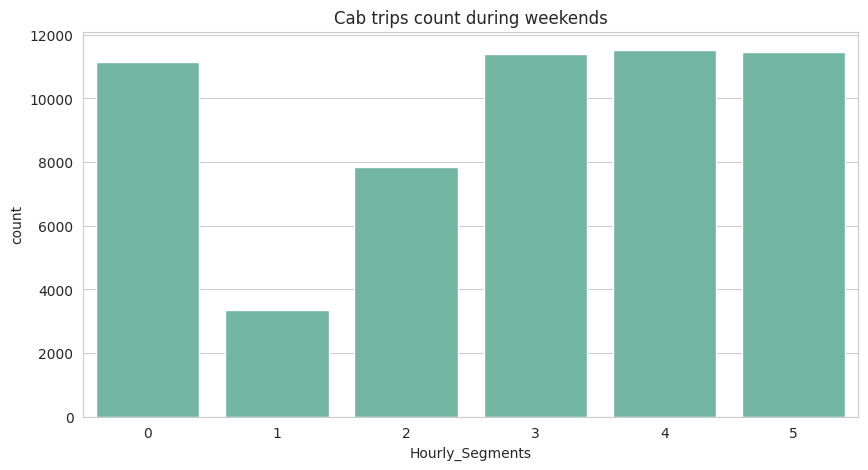

In [35]:

# Set the figure size, grid type, and color palette
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Set the title
plt.title('Cab trips count during weekends')

# Plot the countplot for weekends
sns.countplot(x='Hourly_Segments', data=df.loc[(df.weekday >= 5) & (df.weekday <= 6)])

# Show the plot
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.feature_selection import RFE

from sklearn.ensemble import ExtraTreesRegressor

# Initialize the Extra Trees Regressor
model = ExtraTreesRegressor()

# Initialize the RFE with the Extra Trees Regressor and the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)  # Set the desired number of features

# Fit the RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'year'],
      dtype='object')


In [39]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
base_estimator = RandomForestRegressor()

bagging = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=5,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
)

bagging.fit(X_train, y_train)

predictions = bagging.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 6.85600834875553


In [40]:
from sklearn.metrics import r2_score

# Make predictions on the test data
predictions = bagging.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.7696692524854573


In [41]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the Extra Trees Regressor
ExtraTreesRegressor()

X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = ExtraTreesRegressor()

bagging = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=5,
    max_samples=1.0,
    max_features=1.0,
    bootstrap= False,   #note here
)

bagging.fit(X_train, y_train)

predictions = bagging.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 7.140333152214287


In [42]:
from sklearn.metrics import r2_score

# Make predictions on the test data
predictions = bagging.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.7601172302027732
